In [13]:
import pandas as pd 
import sklearn
import numpy as np
import re

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# list of stopwords like articles, preposition
stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import chi2

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#read the csv file
data = pd.read_csv('IMDB.csv')

In [58]:
#data.head()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [6]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
data.shape

(1000, 12)

In [9]:
data['Genre'].value_counts()

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Crime,Drama,Mystery           23
Action,Adventure,Drama        18
Action,Crime,Drama            17
Horror,Thriller               16
Drama,Thriller                15
Adventure,Family,Fantasy      14
Biography,Drama               14
Action,Adventure,Comedy       14
Biography,Drama,History       14
Action,Crime,Thriller         12
Action,Comedy,Crime           12
Action,Adventure,Thriller     11
Horror                        11
Crime,Drama                   10
Horror,Mystery,Thriller        9
Animation,Action,Adventure     9
Thriller                       9
Action,Thriller                9
Biography,Crime,Drama          9
Biography,Drama,Sport          8
          

In [15]:
ncol = data['Genre'].value_counts() > 10

In [19]:
data[data['Genre']== "Comedy"]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,ngenre
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,NaN
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN,NaN
28,29,Bad Moms,Comedy,When three overworked and under-appreciated mo...,Jon Lucas,"Mila Kunis, Kathryn Hahn, Kristen Bell,Christi...",2016,100,6.2,66540,113.08,60.0,NaN
30,31,Why Him?,Comedy,A holiday gathering threatens to go off the ra...,John Hamburg,"Zoey Deutch, James Franco, Tangie Ambrose,Cedr...",2016,111,6.3,48123,60.31,39.0,NaN
106,107,The Comedian,Comedy,A look at the life of an aging insult comic na...,Taylor Hackford,"Robert De Niro, Leslie Mann, Danny DeVito, Edi...",2016,120,5.4,1954,1.66,40.0,NaN
115,116,Office Christmas Party,Comedy,When his uptight CEO sister threatens to shut ...,Josh Gordon,"Jason Bateman, Olivia Munn, T.J. Miller,Jennif...",2016,105,5.8,30761,54.73,42.0,NaN
148,149,Superbad,Comedy,Two co-dependent high school seniors are force...,Greg Mottola,"Michael Cera, Jonah Hill, Christopher Mintz-Pl...",2007,113,7.6,442082,121.46,76.0,NaN
255,256,The Hangover,Comedy,Three buddies wake up from a bachelor party in...,Todd Phillips,"Zach Galifianakis, Bradley Cooper, Justin Bart...",2009,100,7.8,611563,277.31,73.0,NaN
266,267,Dirty Grandpa,Comedy,"Right before his wedding, an uptight guy is tr...",Dan Mazer,"Robert De Niro, Zac Efron, Zoey Deutch, Aubrey...",2016,102,6.0,75137,35.54,18.0,NaN
278,279,Everybody Wants Some!!,Comedy,"In 1980, a group of college baseball players n...",Richard Linklater,"Blake Jenner, Tyler Hoechlin, Ryan Guzman,Zoey...",2016,117,7.0,36312,3.37,83.0,NaN


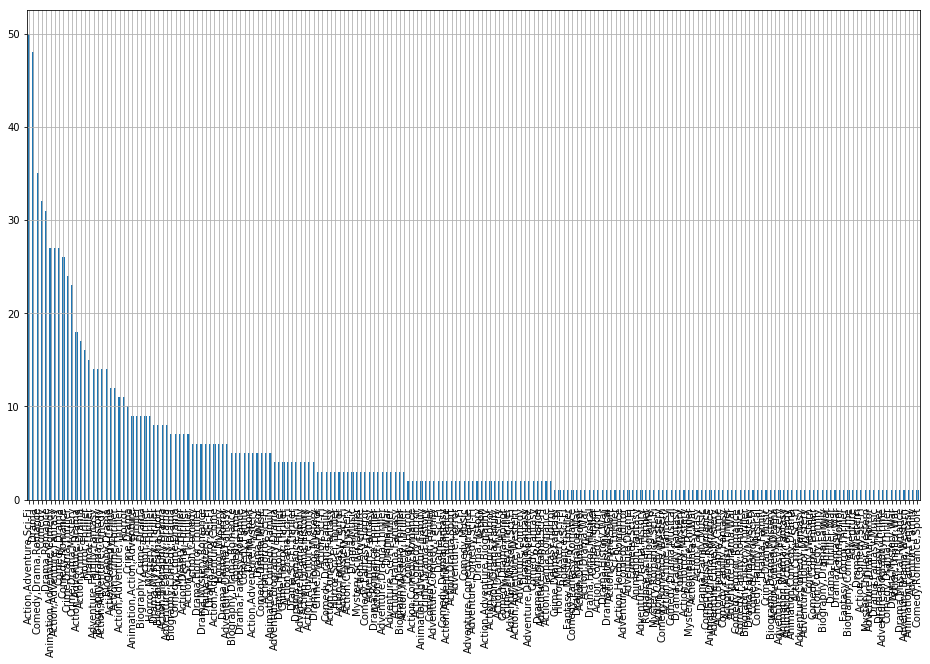

In [6]:
#Let's check the distribution of the different categories across the dataset.
data.Genre.value_counts().plot(kind='bar', grid=True, figsize=(16, 9))

In [8]:
list_of_values = ['Title', 'Genre', 'Description']

data_proc = data[list(list_of_values)]

In [9]:
data_proc.head()

,Title,Genre,Description
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te..."
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea..."
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...


In [10]:
data_proc.shape

(1000, 3)

In [11]:
#break the descriptions into sentences and then break the sentences into tokens
#remove punctuation and stop words
#lowercase the tokens

def tokenizer(text):
    try:
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
        
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent

        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        tokens = list(filter(lambda t: t not in punctuation, tokens))
        tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', 
                                            u'\u2014', u'\u2026', u'\u2013'], tokens))
        filtered_tokens = []
        for token in tokens:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)

        filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))

        return filtered_tokens
    except Error as e:
        print(e)

In [14]:
#A new column 'tokens' can be easily created using the map method applied to the 'description' column.
data['tokens'] = data['Description'].map(tokenizer)

In [15]:
for descripition, tokens in zip(data['Description'].head(5), data['tokens'].head(5)):
    print('description:', descripition)
    print('tokens:', tokens)
    print() 

description: A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.
tokens: ['group', 'intergalactic', 'criminals', 'forced', 'work', 'together', 'stop', 'fanatical', 'warrior', 'taking', 'control', 'universe']

description: Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.
tokens: ['following', 'clues', 'origin', 'mankind', 'team', 'finds', 'structure', 'distant', 'moon', 'soon', 'realize', 'alone']

description: Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.
tokens: ['three', 'girls', 'kidnapped', 'man', 'diagnosed', 'distinct', 'personalities', 'must', 'try', 'escape', 'apparent', 'emergence', 'frightful', 'new', '24th']

description: In a city of humanoid animals, a hustling theater impresario's attempt to save his theater w

In [16]:
#group the tokens by category, apply a word count and display the top 10 most frequent tokens

def keywords(category):
    tokens = data[data['Genre'] == category]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

In [17]:
for category in set(data['Genre']):
    print('category :', category)
    print('top 10 keywords:', keywords(category))
    print('---')

category : Comedy,Romance,Sport
top 10 keywords: [('one', 2), ('troubles', 1), ('brother', 1), ('learns', 1), ('decides', 1), ('teammates', 1), ('elite', 1), ('school', 1), ('proceeds', 1), ('weeks', 1)]
---
category : Comedy,Fantasy
top 10 keywords: [('bear', 2), ('apocalypse', 1), ('attending', 1), ('true', 1), ('lori', 1), ('whose', 1), ('james', 1), ('bringing', 1), ('jay', 1), ('life', 1)]
---
category : Comedy,Drama,Family
top 10 keywords: [('life', 3), ('foster', 2), ('vortex', 1), ('teenager', 1), ('mom', 1), ('rewrite', 1), ('thing', 1), ('jumped', 1), ('makes', 1), ('local', 1)]
---
category : Action,Drama,Horror
top 10 keywords: [('struggle', 1), ('virus', 1), ('zombie', 1), ('train', 1), ('seoul', 1), ('south', 1), ('passengers', 1), ('survive', 1), ('breaks', 1), ('korea', 1)]
---
category : Drama,History
top 10 keywords: [('days', 2), ('prospector', 1), ('oil', 1), ('chris', 1), ('brilliant', 1), ('madness', 1), ('triangle', 1), ('journalist', 1), ('student', 1), ('ana', 

In [18]:
# min_df is minimum number of documents that contain a term t
# max_features is maximum number of unique tokens (across documents) that we'd consider
# TfidfVectorizer preprocesses the descriptions using the tokenizer we defined above

vectorizer = TfidfVectorizer(min_df=10, max_features=10000, tokenizer=tokenizer, ngram_range=(1, 2))
vz = vectorizer.fit_transform(list(data['Description']))

In [19]:
vz.shape

(1000, 266)

In [20]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [21]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
young,3.088473
new,3.283782
life,3.365460
world,3.408945
two,3.514306
man,3.539307
must,3.660260
family,3.719100
woman,3.765620
one,3.831217


In [22]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
kidnapped,5.51086
based,5.51086
small town,5.51086
york city,5.51086
book,5.51086
break,5.51086
baby,5.51086
soldier,5.51086
threat,5.51086
unexpected,5.51086


In [23]:
vz.shape

(1000, 266)

In [24]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz)

In [25]:
svd_tfidf.shape

(1000, 50)

In [26]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.236957
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.114569
[t-SNE] Error after 175 iterations: 1.114569


In [27]:
tsne_tfidf.shape

(1000, 2)

In [28]:
tsne_tfidf

array([[-19.59358193,  10.86530939],
       [ -4.33826423,  14.17912558],
       [  1.01421983,  -7.41888246],
       ..., 
       [ -1.45654454,  21.26106467],
       [  0.10732531,  13.7205262 ],
       [-16.43645978,  14.15022663]])

In [29]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [30]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="tf-idf clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

Loading BokehJS ...

In [31]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
tfidf_df['description'] = data['Description']
tfidf_df['category'] = data['Genre']

In [32]:
plot_tfidf.scatter(x='x', y='y', source=tfidf_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "category":"@category"}
show(plot_tfidf)

In [33]:
vz.shape

(1000, 266)

In [34]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.cluster import MiniBatchKMeans

num_clusters = 30
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

In [35]:
for (i, desc),category in zip(enumerate(data.Description),data['Genre']):
    if(i < 5):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + desc + 
              "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")
        print('category: ',category)
        print('---')

Cluster 14: A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.(distance: 0.881631320548)
category:  Action,Adventure,Sci-Fi
---
Cluster 18: Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.(distance: 0.939806489403)
category:  Adventure,Mystery,Sci-Fi
---
Cluster 0: Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.(distance: 0.963104138587)
category:  Horror,Thriller
---
Cluster 6: In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.(distance: 0.943017051637)
category:  Animation,Comedy,Family
---
Cluster 23: A secret government agency recruits some of the most

In [36]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    aux = ''
    for j in sorted_centroids[i, :10]:
        aux += terms[j] + ' | '
    print(aux)
    print() 

Cluster 0:
man | two | young | house | american | child | go | three | lives | takes | 

Cluster 1:
human | tries | young | story | childhood | woman | organization | turn | events | order | 

Cluster 2:
earth | must | order | starts | save | stop | evil | four | fight | new | 

Cluster 3:
mysterious | death | young | husband | vampire | boy | finds | quest | mother | lives | 

Cluster 4:
story | set | true | love | based | two | world | family | follows | american | 

Cluster 5:
home | war | soon | company | young | discovers | family | new | secret | college | 

Cluster 6:
find | two | new | mysterious | dead | group | friends | government | one | sets | 

Cluster 7:
back | behind | together | turns | wife | lives | past | secret | bond | family | 

Cluster 8:
former | life | band | agent | world | uncover | home | secrets | face | man | 

Cluster 9:
one | team | battle | attempt | must | take | another | make | lives | new | 

Cluster 10:
school | high | high school | party | begins

In [37]:
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.059493
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.714602
[t-SNE] Error after 200 iterations: 0.714602


In [38]:
import numpy as np

colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
"#e3be38", "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
"#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", "#d07d3c",
"#52697d", "#7d6d33", "#d27c88", "#36422b", "#b68f79"])

plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [39]:
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['description'] = data['Description']
kmeans_df['category'] = data['Genre']

In [40]:
plot_kmeans.scatter(x='x', y='y', 
                    color=colormap[kmeans_clusters], 
                    source=kmeans_df)
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "category": "@category", "cluster":"@cluster"}
show(plot_kmeans)

In [41]:
#LDA on the data set. We'll set the number of topics to 20.
import lda
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
import logging
logging.getLogger("lda").setLevel(logging.WARNING)

In [43]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
cvectorizer = CountVectorizer(min_df=4, max_features=10000, tokenizer=tokenizer, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(data['Description'])

n_topics = 20
n_iter = 2000
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(cvz)

In [44]:
n_top_words = 8
topic_summaries = []

topic_word = lda_model.topic_word_  # get the topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: story years american become family later film starts
Topic 1: school two high friends high school college student relationship
Topic 2: town journey small take returns lives forces set
Topic 3: mysterious secret finds plot behind past secrets bond
Topic 4: home war family events face company series whose
Topic 5: one life love discover true story three around
Topic 6: see full takes full summary see full summary one live
Topic 7: father son child young boy mother world revenge
Topic 8: girl love two begins young family couple teenage
Topic 9: new city find york new york group friends go
Topic 10: two new king queen power everything land put
Topic 11: life los angeles los angeles adventure changes leads puts
Topic 12: together lives back work killer must may past
Topic 13: gets world dangerous finds rescue caught crew car
Topic 14: must fight stop earth world save evil alien
Topic 15: young woman man find young woman young man search three
Topic 16: life new wife former world h

In [45]:
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.172095
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.042321
[t-SNE] Error after 175 iterations: 1.042321


In [46]:
doc_topic = lda_model.doc_topic_
lda_keys = []
for i, tweet in enumerate(data['Description']):
    lda_keys += [doc_topic[i].argmax()]

In [47]:
plot_lda = bp.figure(plot_width=700, plot_height=600, title="LDA topic visualization",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [48]:
lda_df = pd.DataFrame(tsne_lda, columns=['x','y'])
lda_df['description'] = data['Description']
lda_df['category'] = data['Genre']

In [49]:
lda_df['topic'] = lda_keys
lda_df['topic'] = lda_df['topic'].map(int)

In [50]:
plot_lda.scatter(source=lda_df, x='x', y='y', color=colormap[lda_keys])

hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"description":"@description", "topic":"@topic", "category":"@category"}
show(plot_lda)

In [51]:
lda_df['len_docs'] = data['tokens'].map(len)

In [52]:
def prepareLDAData():
    data = {
        'vocab': vocab,
        'doc_topic_dists': lda_model.doc_topic_,
        'doc_lengths': list(lda_df['len_docs']),
        'term_frequency':cvectorizer.vocabulary_,
        'topic_term_dists': lda_model.components_
    } 
    return data

In [53]:
ldadata = prepareLDAData()



In [54]:
import pyLDAvis

In [55]:
pyLDAvis.enable_notebook()

In [56]:
prepared_data = pyLDAvis.prepare(**ldadata)

/Users/sanjay/anaconda/lib/python3.5/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [57]:
prepared_data

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
14     5.884595        1       1 -0.039972  0.195482
5      5.647435        1       2 -0.105453 -0.040080
8      5.615480        1       3 -0.137368 -0.079833
12     5.460932        1       4  0.050857 -0.090355
0      5.391950        1       5 -0.154722  0.081307
15     5.307276        1       6 -0.114044 -0.162608
17     5.271987        1       7 -0.037359  0.192524
4      5.228783        1       8  0.026008  0.011038
2      5.170025        1       9  0.120151  0.019414
3      5.103765        1      10 -0.125074 -0.067425
10     4.966681        1      11  0.009722 -0.048863
13     4.850633        1      12 -0.139159  0.149784
16     4.843750        1      13  0.132943  0.171815
19     4.711050        1      14 -0.018896 -0.040193
1      4.687124        1      15  0.023114 -0.210821
9      4.670320        1      16  0.262004 -0.065159
7      4.557203        1      17 -0.124402  0.054431
18     4.531258        1      18  0.178447  0.099442
6      4.360612        1      19 -0.002485 -0.147989
11     3.739140        1      20  0.195688 -0.021910, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
981   Default  201.000000          young  201.000000  30.0000  30.0000
592   Default  174.000000            new  174.000000  29.0000  29.0000
488   Default  169.000000           life  169.000000  28.0000  28.0000
961   Default   99.000000          woman   99.000000  27.0000  27.0000
525   Default  127.000000            man  127.000000  26.0000  26.0000
610   Default  103.000000            one  103.000000  25.0000  25.0000
907   Default  129.000000            two  129.000000  24.0000  24.0000
744   Default   70.000000         school   70.000000  23.0000  23.0000
969   Default  156.000000          world  156.000000  22.0000  22.0000
575   Default  110.000000           must  110.000000  21.0000  21.0000
817   Default   93.000000          story   93.000000  20.0000  20.0000
310   Default   88.000000           find   88.000000  19.0000  19.0000
333   Default   83.000000        friends   83.000000  18.0000  18.0000
352   Default   69.000000           girl   69.000000  17.0000  17.0000
298   Default   64.000000         father   64.000000  16.0000  16.0000
511   Default   83.000000           love   83.000000  15.0000  15.0000
291   Default  109.000000         family  109.000000  14.0000  14.0000
20    Default   51.000000          agent   51.000000  13.0000  13.0000
976   Default   59.000000          years   59.000000  12.0000  12.0000
873   Default   52.000000       together   52.000000  11.0000  11.0000
800   Default   46.000000            son   46.000000  10.0000  10.0000
147   Default   53.000000           city   53.000000   9.0000   9.0000
399   Default   77.000000           home   77.000000   8.0000   8.0000
578   Default   82.000000     mysterious   82.000000   7.0000   7.0000
367   Default   78.000000          group   78.000000   6.0000   6.0000
332   Default   47.000000         friend   47.000000   5.0000   5.0000
390   Default   45.000000           high   45.000000   4.0000   4.0000
64    Default   59.000000           back   59.000000   3.0000   3.0000
496   Default   62.000000          lives   62.000000   2.0000   2.0000
312   Default   85.000000          finds   85.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
489   Topic20    8.787011   life changes    9.099479   3.2514  -4.2172
916   Topic20    7.033117     underworld    7.345584   3.2428  -4.4398
1     Topic20    7.033117          1950s    7.345584   3.2428  -4.4398
430   Topic20    7.033117    investigate    7.345584   3.2428  -4.4398
702   Topic20    7.033117            red    7.345584   3.2428  -4.4398
415   Topic20    7.033117  inadvertently    7.345584   3.2428  -4.4398
506   Topic20   26.325